# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [53]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

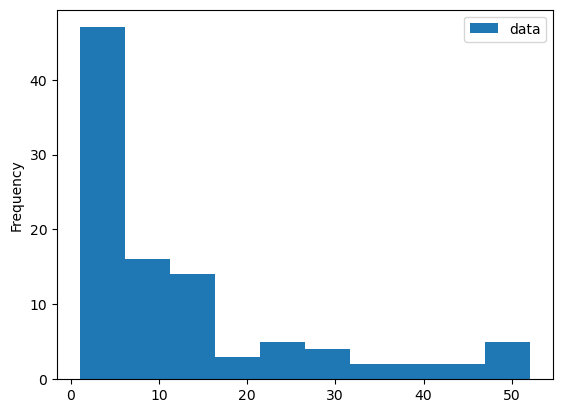

In [54]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

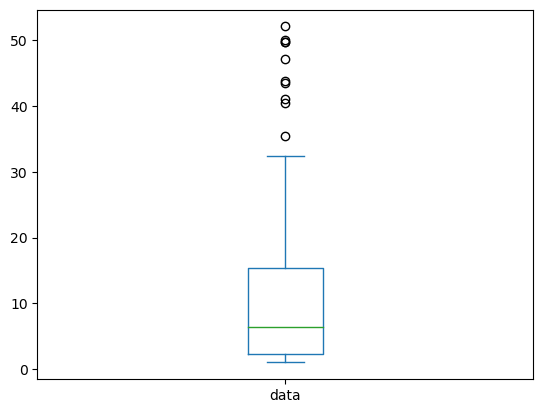

In [55]:
df.plot.box()

In [56]:
print('I personally feel that I get a better picture of the dataset as a whole much quicker from a bar chart \n' \
'That being said, the box plot provides quicker insight into outliers. \n' \
'I think the bar chart could be improved with a legend, \n' \
'while the box plot could be imporved with local annotations to mark the peak outlier, as well at what y value the box ends and begins.')

I personally feel that I get a better picture of the dataset as a whole much quicker from a bar chart 
That being said, the box plot provides quicker insight into outliers. 
I think the bar chart could be improved with a legend, 
while the box plot could be imporved with local annotations to mark the peak outlier, as well at what y value the box ends and begins.


# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [57]:
# get dataset and show major metrics
df = pd.read_csv('data_os_gs.csv')
df.describe()

,overall_survival_days_2years,overall_survival_days_5years,overall_survival_status_2years,overall_survival_status_5years,GS_score_172GS,GS_score_3clustersHPV,GS_score_RSI,GS_score_pancancerCisplatin,GS_score_cl3Hypoxia
count,1097.000000,1097.000000,1097.000000,1097.000000,1.097000e+03,1.097000e+03,1.097000e+03,7.500000e+02,7.500000e+02
mean,545.409732,909.725723,0.251595,0.341841,1.040391e-16,-6.153287e-16,-8.906073e-17,-1.539509e-17,3.552714e-17
std,235.952114,627.519212,0.434128,0.474543,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000,0.000000,0.000000,0.000000,-4.505208e+00,-2.843337e+00,-2.488096e+00,-4.834840e+00,-3.242416e+00
25%,350.000000,350.000000,0.000000,0.000000,-4.815710e-01,-6.674931e-01,-6.799870e-01,-3.019081e-01,-5.206304e-01
50%,730.500000,788.000000,0.000000,0.000000,6.866597e-02,-3.225619e-02,-1.259213e-01,5.535533e-03,3.426548e-02
75%,730.500000,1568.944000,1.000000,1.000000,4.934585e-01,7.081639e-01,6.023981e-01,2.604536e-01,5.884635e-01
max,730.500000,1826.250000,1.000000,1.000000,3.620958e+00,6.903644e+00,4.558302e+00,4.814681e+00,3.126819e+00


In [58]:
print('Its clear here that there is missing data in both columns GS_score_pancancerCisplatin and GS_score_cl3Hypoxia. \n' \
'You can tell the last 4 columns ar normalized already, since the std is 1 for each one.')

Its clear here that there is missing data in both columns GS_score_pancancerCisplatin and GS_score_cl3Hypoxia. 
You can tell the last 4 columns ar normalized already, since the std is 1 for each one.


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097 entries, 0 to 1096
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   supertreat_id                   1097 non-null   object 
 1   overall_survival_days_2years    1097 non-null   float64
 2   overall_survival_days_5years    1097 non-null   float64
 3   overall_survival_status_2years  1097 non-null   int64  
 4   overall_survival_status_5years  1097 non-null   int64  
 5   GS_score_172GS                  1097 non-null   float64
 6   GS_score_3clustersHPV           1097 non-null   float64
 7   GS_score_RSI                    1097 non-null   float64
 8   GS_score_pancancerCisplatin     750 non-null    float64
 9   GS_score_cl3Hypoxia             750 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 85.8+ KB


array([[<Axes: title={'center': 'overall_survival_days_2years'}>,
        <Axes: title={'center': 'overall_survival_days_5years'}>,
        <Axes: title={'center': 'overall_survival_status_2years'}>],
       [<Axes: title={'center': 'overall_survival_status_5years'}>,
        <Axes: title={'center': 'GS_score_172GS'}>,
        <Axes: title={'center': 'GS_score_3clustersHPV'}>],
       [<Axes: title={'center': 'GS_score_RSI'}>,
        <Axes: title={'center': 'GS_score_pancancerCisplatin'}>,
        <Axes: title={'center': 'GS_score_cl3Hypoxia'}>]], dtype=object)

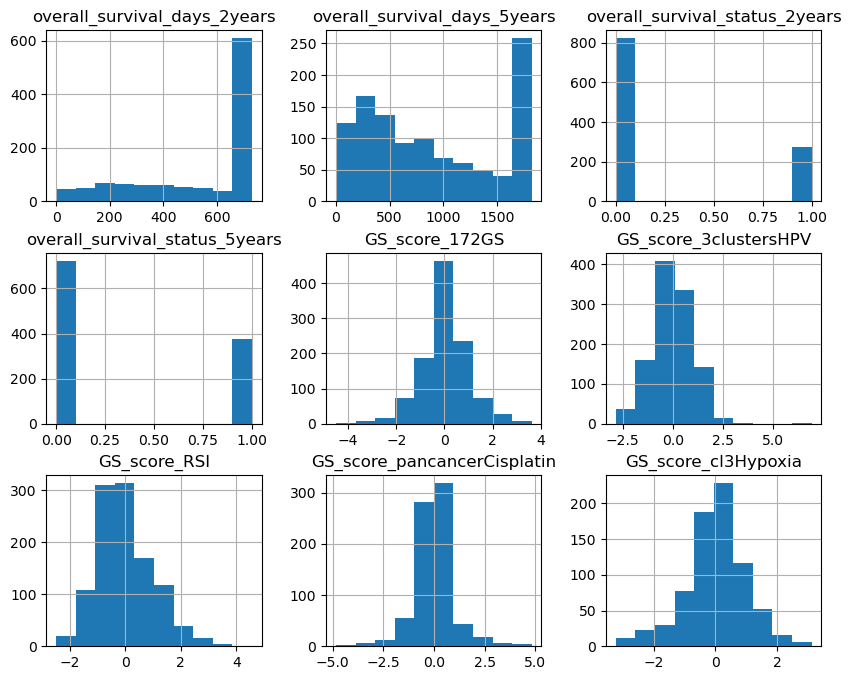

In [60]:
df.hist(figsize=(10, 8), sharex=False, sharey=False)

In [61]:
print('Most columns of this dataset are generally pretty normal, except for GS_score_3clustersHPV and GS_score_RSI, but I think thats b/c this data has already been normalized. \n' \
'It would appear that survival rate is good, given that the survival rate in days is skewed far to the right, and the overall survival status is unbalanced, in favor of not dying from cancer.')

Most columns of this dataset are generally pretty normal, except for GS_score_3clustersHPV and GS_score_RSI, but I think thats b/c this data has already been normalized. 
It would appear that survival rate is good, given that the survival rate in days is skewed far to the right, and the overall survival status is unbalanced, in favor of not dying from cancer.


<Axes: >

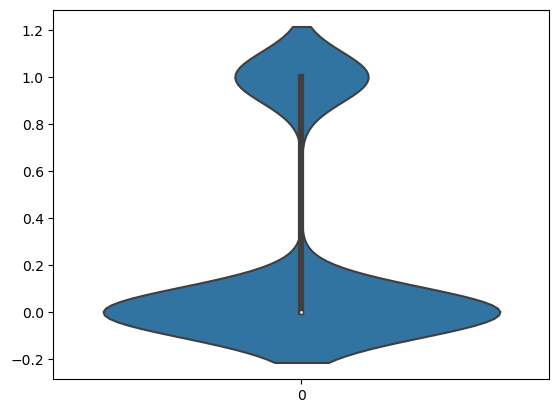

In [62]:
import seaborn as sns

df_clean = df.drop(['supertreat_id'], axis=1)
sns.violinplot(df_clean['overall_survival_status_2years'])

WILL ANALYZE COLUMN GS_score_3clustersHPV since it is skewed left


<Axes: >

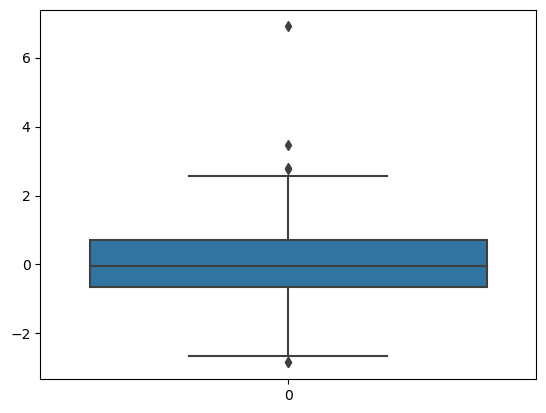

In [63]:
print('WILL ANALYZE COLUMN GS_score_3clustersHPV since it is skewed left')
sns.boxplot(df_clean['GS_score_3clustersHPV'])

/Users/aidenflynn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aidenflynn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aidenflynn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aidenflynn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

<Axes: ylabel='GS_score_3clustersHPV'>

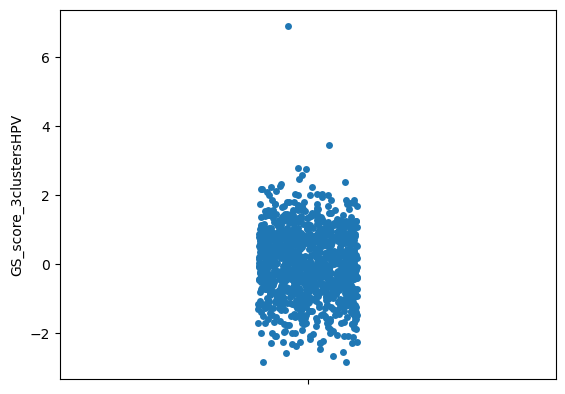

In [64]:
sns.stripplot(df_clean['GS_score_3clustersHPV'])

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

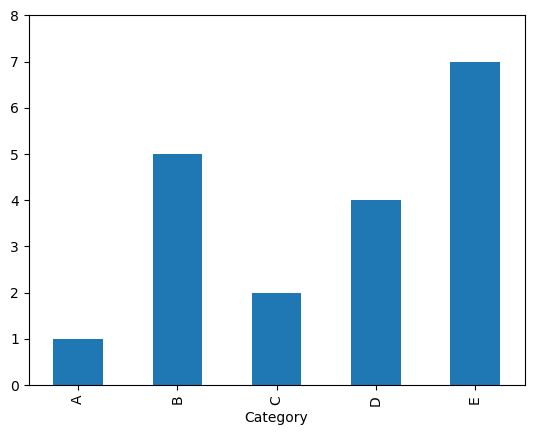

In [65]:
import matplotlib.pyplot as plt

# Example DataFrame
data = {'Category': ['A', 'B', 'C', 'D', 'E'],
        'Value': [1, 5, 2, 4, 7]}
df = pd.DataFrame(data)

# Bar plot
df.plot.bar(x='Category', legend=False, ylim=(0, 8))
plt.show()